In this notebook we test Restricted Boltzmann Machines for Honeycomb Heisenberg model

Honeycomb 3x3 has 18 spins and is numerically solvable. We test for 3x3 and then try to approximate for 5x5 honeycomb, which has 50 spins

In [1]:
import jax.numpy as jnp
import netket as nk
import json
import matplotlib.pyplot as plt
from time import time
from pathlib import Path
from Models import RestrictedBoltzmannMachine

In [2]:
read = False
res_path = Path('./Simulations/6-RBMComparison')
image_path = Path('./images/6-RBMComparison')
extent = [3, 3]
alpha_list = [0.75, 1, 2, 4, 7]
Sz = 0
lr = 0.05
ds = 0.1
n_iter = 1000
n_samples = 800
rbm_results0 = []

In [3]:
honey = nk.graph.Honeycomb(extent=extent, pbc=True)
hilbert = nk.hilbert.Spin(s=1/2, total_sz=Sz, N=honey.n_nodes)
hamiltonian = nk.operator.Heisenberg(hilbert=hilbert, graph=honey, J=1)
eval_gs = nk.exact.lanczos_ed(hamiltonian, k=1, compute_eigenvectors=False)[0]
eval_gs

-40.38866334601949

In [4]:
for alpha in alpha_list:
    honey_path = f'{res_path}/HeisenbergHoneycomb/rbmN{honey.n_nodes}' \
                 f'alpha{alpha}{"Sz0" if Sz == 0 else ""}lr{lr}niter{n_iter}n_samples{n_samples}'
    if not read:
        honey = nk.graph.Honeycomb(extent=extent, pbc=True)
        hilbert = nk.hilbert.Spin(s=1/2, total_sz=Sz, N=honey.n_nodes)
        hamiltonian = nk.operator.Heisenberg(hilbert=hilbert, graph=honey, J=1)
        sampler = nk.sampler.MetropolisExchange(hilbert=hilbert, graph=honey)
        optimizer = nk.optimizer.Sgd(learning_rate=lr)
        sr = nk.optimizer.SR(diag_shift=ds)
        rbm = RestrictedBoltzmannMachine(alpha=alpha, param_dtype=jnp.float32)
        vstate = nk.vqs.MCState(sampler, rbm, n_samples=n_samples)
        gs = nk.VMC(hamiltonian=hamiltonian, optimizer=optimizer, 
                    preconditioner=sr, variational_state=vstate)
        
        start = time()
        gs.run(n_iter=n_iter, out=honey_path)
        print(f'Time: {(t := time()-start):.3f} seconds')
        rbm_result = json.load(open(f'{honey_path}.log'))
        rbm_result['time'] = t
        if eval_gs is not None:
            rbm_result['gs'] = float(eval_gs)
        json.dump(rbm_result, open(f'{honey_path}.log', 'w'))
        rbm_results0.append(rbm_result)
    else:
        rbm_results0.append(json.load(open(f'{honey_path}.log')))

  0%|          | 0/1000 [00:00<?, ?it/s]

Time: 37.388 seconds


  0%|          | 0/1000 [00:00<?, ?it/s]

Time: 41.534 seconds


  0%|          | 0/1000 [00:00<?, ?it/s]

Time: 66.680 seconds


  0%|          | 0/1000 [00:00<?, ?it/s]

Time: 103.915 seconds


  0%|          | 0/1000 [00:00<?, ?it/s]

Time: 165.197 seconds


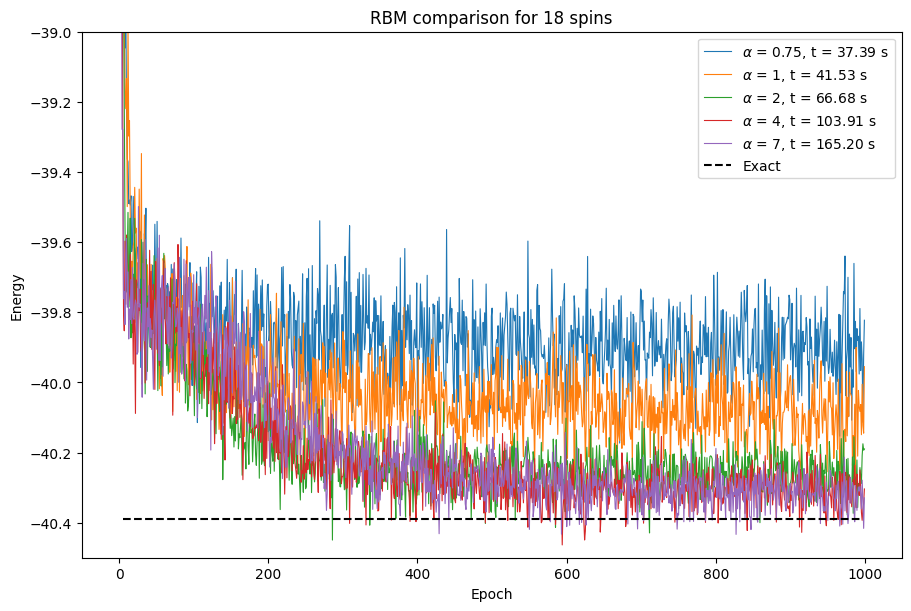

In [5]:
figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(9, 6))
for rbm_res, alpha in zip(rbm_results0, alpha_list):
    axes.plot(rbm_res['Energy']['iters'], rbm_res['Energy']['Mean'], linewidth=0.8,
              label=f'$\\alpha$ = {alpha}, t = {rbm_res["time"]:.2f} s')
if eval_gs is not None: 
    axes.axhline(y=eval_gs, xmin=0.05, xmax=0.95, 
                 color='black', linestyle='--', label='Exact')
axes.set(xlabel='Epoch', ylabel='Energy', ylim=[-40.5, -39],
         title=f'RBM comparison for {honey.n_nodes} spins')
axes.legend()
figure.savefig(image_path / f'Honeycomb{extent}Iter{n_iter}Samples{n_samples}.png');

In [12]:
read = False
extent = [5, 5]
eval_gs = None
Sz = 0
lr = 0.05
ds = 0.1
n_iter = 5000
n_samples = 800
rbm_results1 = []

In [13]:
for alpha in alpha_list:
    honey_path = f'{res_path}/HeisenbergHoneycomb/rbmN{honey.n_nodes}' \
                 f'alpha{alpha}{"Sz0" if Sz == 0 else ""}lr{lr}niter{n_iter}n_samples{n_samples}'
    if not read:
        honey = nk.graph.Honeycomb(extent=extent, pbc=True)
        hilbert = nk.hilbert.Spin(s=1/2, total_sz=Sz, N=honey.n_nodes)
        hamiltonian = nk.operator.Heisenberg(hilbert=hilbert, graph=honey, J=1)
        sampler = nk.sampler.MetropolisExchange(hilbert=hilbert, graph=honey)
        optimizer = nk.optimizer.Sgd(learning_rate=lr)
        sr = nk.optimizer.SR(diag_shift=ds)
        rbm = RestrictedBoltzmannMachine(alpha=alpha, param_dtype=jnp.float32)
        vstate = nk.vqs.MCState(sampler, rbm, n_samples=n_samples)
        gs = nk.VMC(hamiltonian=hamiltonian, optimizer=optimizer, 
                    preconditioner=sr, variational_state=vstate)
        
        start = time()
        gs.run(n_iter=n_iter, out=honey_path)
        print(f'Time: {(t := time()-start):.3f} seconds')
        rbm_result = json.load(open(f'{honey_path}.log'))
        rbm_result['time'] = t
        if eval_gs is not None:
            rbm_result['gs'] = float(eval_gs)
        json.dump(rbm_result, open(f'{honey_path}.log', 'w'))
        rbm_results1.append(rbm_result)
    else:
        rbm_results1.append(json.load(open(f'{honey_path}.log')))

  0%|          | 0/5000 [00:00<?, ?it/s]

Time: 890.376 seconds


  0%|          | 0/5000 [00:00<?, ?it/s]

Time: 1138.914 seconds


  0%|          | 0/5000 [00:00<?, ?it/s]

Time: 1949.956 seconds


  0%|          | 0/5000 [00:00<?, ?it/s]

Time: 3614.466 seconds


  0%|          | 0/5000 [00:00<?, ?it/s]

Time: 6073.164 seconds


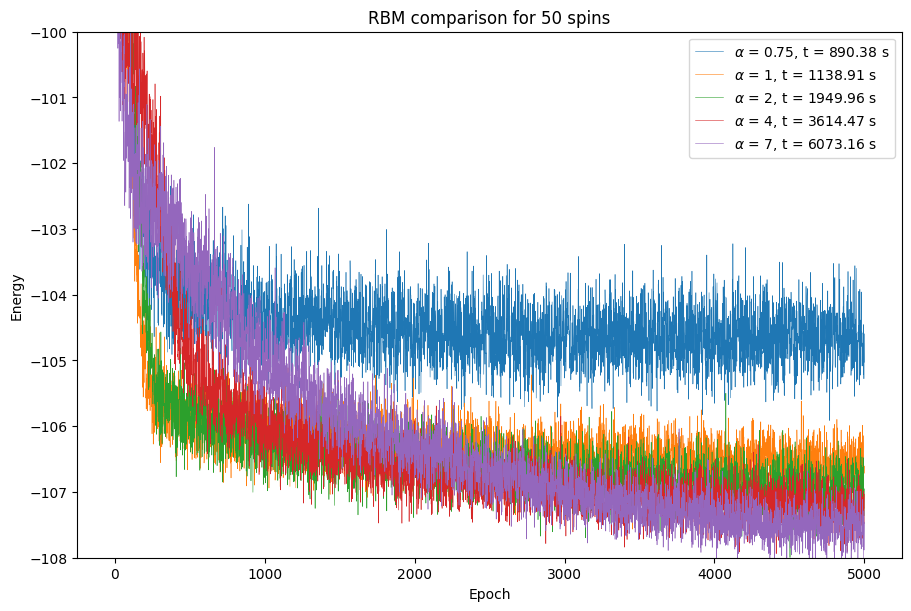

In [17]:
figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(9, 6))
for rbm_res, alpha in zip(rbm_results1, alpha_list):
    axes.plot(rbm_res['Energy']['iters'], rbm_res['Energy']['Mean'], linewidth=0.4,
              label=f'$\\alpha$ = {alpha}, t = {rbm_res["time"]:.2f} s')
if eval_gs is not None: 
    axes.axhline(y=eval_gs, xmin=0.05, xmax=0.95,
                 color='black', linestyle='--', label='Exact')
axes.set(xlabel='Epoch', ylabel='Energy', ylim=[-108, -100],
         title=f'RBM comparison for {honey.n_nodes} spins')
axes.legend()
figure.savefig(image_path / f'Honeycomb{extent}Iter{n_iter}Samples{n_samples}.png');